In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import time
import os

In [1]:
%%bash
wget "https://pjreddie.com/media/files/yolov3.weights"

--2024-06-22 05:16:02--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

     0K .......... .......... .......... .......... ..........  0% 1.91M 2m4s
    50K .......... .......... .......... .......... ..........  0%  242K 9m21s
   100K .......... .......... .......... .......... ..........  0% 24.6M 6m17s
   150K .......... .......... .......... .......... ..........  0% 1.98M 5m13s
   200K .......... .......... .......... .......... ..........  0% 1.58M 4m40s
   250K .......... .......... .......... .......... ..........  0% 19.5M 3m55s
   300K .......... .......... .......... .......... ..........  0% 9.83M 3m25s
   350K .......... .......... .......... .......... ..........  0% 6.06M 3m4s
   400K .......... .......... .......... 

In [2]:
%%bash
wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"

--2024-06-22 05:19:38--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

     0K ........                                              100% 33.7M=0s

2024-06-22 05:19:38 (33.7 MB/s) - ‘yolov3.cfg’ saved [8342/8342]



In [65]:
CONFIDENCE=0.6
SCORE_THRESHOLD=0.5
IOU_THRESHOLD=0.5

#loading the class labels(objects)
labels=[ 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter',
    'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
    'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
    'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet',
    'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
    'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush']
#generating colors for each object for later plotting
colors=np.random.randint(0,255, size=(len(labels),3),dtype="uint8")

In [66]:
colors.shape

(80, 3)

In [67]:
#load the yolo network
net=cv2.dnn.readNetFromDarknet("yolov3.cfg","yolov3.weights")

In [68]:
type(net)

cv2.dnn.Net

In [69]:
image=cv2.imread('jungle.jpg')
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
file_name= os.path.basename('jungle.jpg')
filename, ext= file_name.split(".")

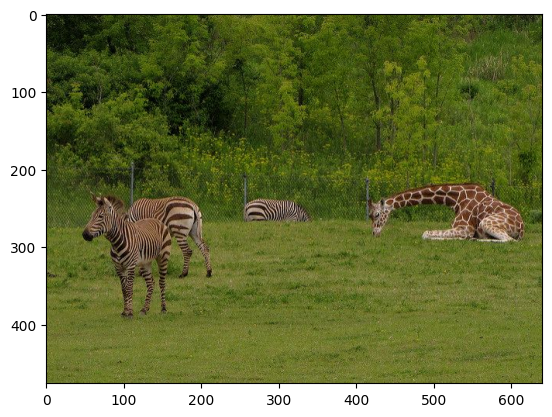

In [70]:
plt.imshow(image);

In [71]:
h, w= image.shape[:2]
#create the 4D blob
blob=cv2.dnn.blobFromImage(image, 1/255.0, (416,416), swapRB=True, crop=False)

In [72]:
blob

array([[[[0.04705882, 0.01960784, 0.06666667, ..., 0.1254902 ,
          0.07843138, 0.10980392],
         [0.00392157, 0.05882353, 0.08627451, ..., 0.07058824,
          0.07058824, 0.08235294],
         [0.01176471, 0.05098039, 0.05098039, ..., 0.02352941,
          0.10196079, 0.14901961],
         ...,
         [0.13725491, 0.15294118, 0.15294118, ..., 0.12941177,
          0.16078432, 0.13725491],
         [0.15294118, 0.16470589, 0.17254902, ..., 0.1882353 ,
          0.14901961, 0.15294118],
         [0.2       , 0.20392157, 0.21176471, ..., 0.1764706 ,
          0.17254902, 0.14509805]],

        [[0.16862746, 0.11372549, 0.18431373, ..., 0.3019608 ,
          0.27058825, 0.30980393],
         [0.10196079, 0.16862746, 0.2       , ..., 0.24313726,
          0.2627451 , 0.28627452],
         [0.11372549, 0.16470589, 0.14901961, ..., 0.1882353 ,
          0.29803923, 0.34901962],
         ...,
         [0.42745098, 0.4392157 , 0.44313726, ..., 0.42352942,
          0.46666667, 0.4

In [73]:
ln= net.getLayerNames()
ln

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [74]:
net.getUnconnectedOutLayers()

array([200, 227, 254], dtype=int32)

In [75]:
from ast import Index
#sets the blob as the input of the network
net.setInput(blob)
#get all the layer names
ln=net.getLayerNames()
try:
    ln=[ln[i[0]-1] for i in net.getUnconnectedOutLayers()]
except IndexError:
  #in case getUnconnectedOutLayers() return 1D array when CUDA isnt available
  ln=[ln[i -1] for i in net.getUnconnectedOutLayers()]
  #feed forward (inference) and get the network output
layer_outputs=net.forward(ln)

In [76]:
layer_outputs

(array([[0.03155247, 0.04028403, 0.28403947, ..., 0.        , 0.        ,
         0.        ],
        [0.04219297, 0.0294946 , 0.23797372, ..., 0.        , 0.        ,
         0.        ],
        [0.03956942, 0.03125083, 0.8829473 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9573964 , 0.95129865, 0.49436393, ..., 0.        , 0.        ,
         0.        ],
        [0.9560443 , 0.9671822 , 0.32762206, ..., 0.        , 0.        ,
         0.        ],
        [0.9637412 , 0.9515038 , 0.78527254, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.02102786, 0.01836234, 0.05919967, ..., 0.        , 0.        ,
         0.        ],
        [0.01356249, 0.01778921, 0.297508  , ..., 0.        , 0.        ,
         0.        ],
        [0.02029595, 0.01704775, 0.08835562, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.96978503, 0.9751966 , 0.04962498, ..., 0.        , 0.        ,
         0.        

In [77]:
boxes, confidences, class_ids=[], [], []
for output in layer_outputs:
  #loop over each of the object detection
  for detection in output:
    #extract the class id (label) and confidence (as a probability) of the current object detection
    scores= detection[5:]
    class_id=np.argmax(scores)
    confidence= scores[class_id]
    #discard out weak predictions by ensuring the detected
    #probability is greater than the minimum probability
    if confidence > CONFIDENCE:
      #scale the bounding box coordinates back relative to the
      #size of the image, keeping in mind that YOLO actually
      #returns the center (x,y)-coordinates of the bounding
      #box followed by the boxes' width and height
      box=detection[0:4]*np.array([w,h,w,h])
      (centerX, centerY, width, height)=box.astype("int")
      #use the center (x,y)-coordinates to derive the top and
      #left corner of the bounding box
      x=int(centerX-(width/2))
      y=int(centerY-(height/2))
      #update our list of bounding box coordinates, confidences,
      #and class IDs
      boxes.append([x,y,int(width),int(height)])
      confidences.append(float(confidence))
      class_ids.append(class_id)

In [59]:
#loop over the indexes we are keeping
for i in range(len(boxes)):
  #extract the bounding box coordinates
  x,y=boxes[i][0], boxes[i][1]
  w,h=boxes[i][2], boxes[i][3]
  #draw a bounding box rectangle and label on the image
  color=[int(c) for c in colors[class_ids[i]]]
  cv2.rectangle(image, (x,y), (x+w, y+h), color,thickness=2)
  text=f"{labels[class_ids[i]]}: {confidences[i]:.2f}"
  #calculate text width & height to draw the transparent boxes as background of the text
  (text_width, text_height)=cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, fontScale=1.4,thickness= 2)[0]
  text_offset_x=x
  text_offset_y=y-5
  box_coords=((text_offset_x, text_offset_y), (text_offset_x+text_width+2, text_offset_y-text_height))
  overlay=image.copy()
  cv2.rectangle(overlay, box_coords[0], box_coords[1], color=color,thickness= cv2.FILLED)
  #add opacity (transparency to the box)
  image=cv2.addWeighted(overlay, 0.6, image, 0.4, 0)
  #now put the text (label: confidence %)
  cv2.putText(image, text, (x,y-5), cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.4,color= (0,0,0),thickness=1)


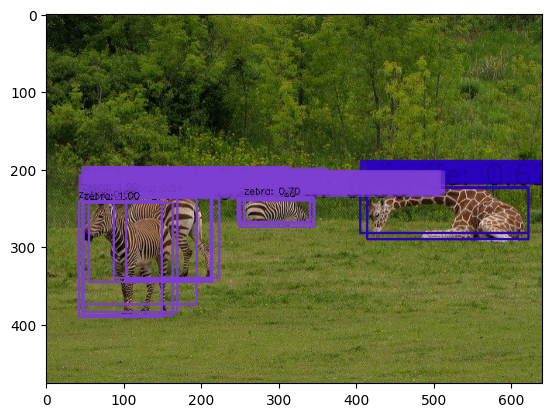

In [60]:
plt.imshow(image);

In [78]:
from operator import index
# Apply non-max suppression to suppress weak and overlapping bounding boxes
indexes=cv2.dnn.NMSBoxes(boxes, confidences, CONFIDENCE, 0.5, 0.4)

In [79]:
indexes

array([11,  6,  1,  0], dtype=int32)

In [80]:
# Draw bounding boxes and labels on the image
for i in range(len(boxes)):
  if i in indexes:
    x, y, w, h = boxes[i]
    label = str(labels[class_ids[i]])
    color = colors[class_ids[i]]
    cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,255), 2)
    cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255), 2)

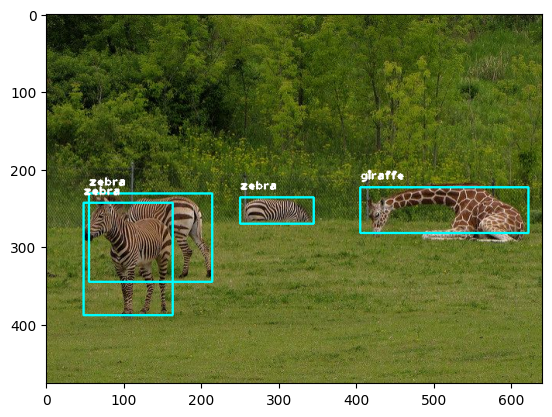

In [81]:
plt.imshow(image);